# Data Processing

In [1]:
import sys
sys.path.insert(0, '../src')

In [2]:
from config import *
from data.data_utils import *
from IPython.display import HTML

In [3]:
preprocess_raw_data(sample=100000)

100%|████████████████████████████████████| 94477/94477 [14:19<00:00, 109.92it/s]


Preprocessed data saved in /Users/tgdimas1/git/CAS-AML-FINAL-PROJECT/notebooks/../src/../data/processed/train_landmark_files.


In [4]:
remove_unusable_data()

100%|████████████████████████████████████| 94477/94477 [06:35<00:00, 239.17it/s]


In [5]:
from data.dataset import ASL_DATASET, label_dict_inference, label_dict

In [6]:
dataset = ASL_DATASET(augment=True)
dataset

ASL_DATASET(Participants: 21, Length: 72758

In [7]:
from visualizations import visualize_target_sign

Generating ......
 Frame : 32: .................................

.

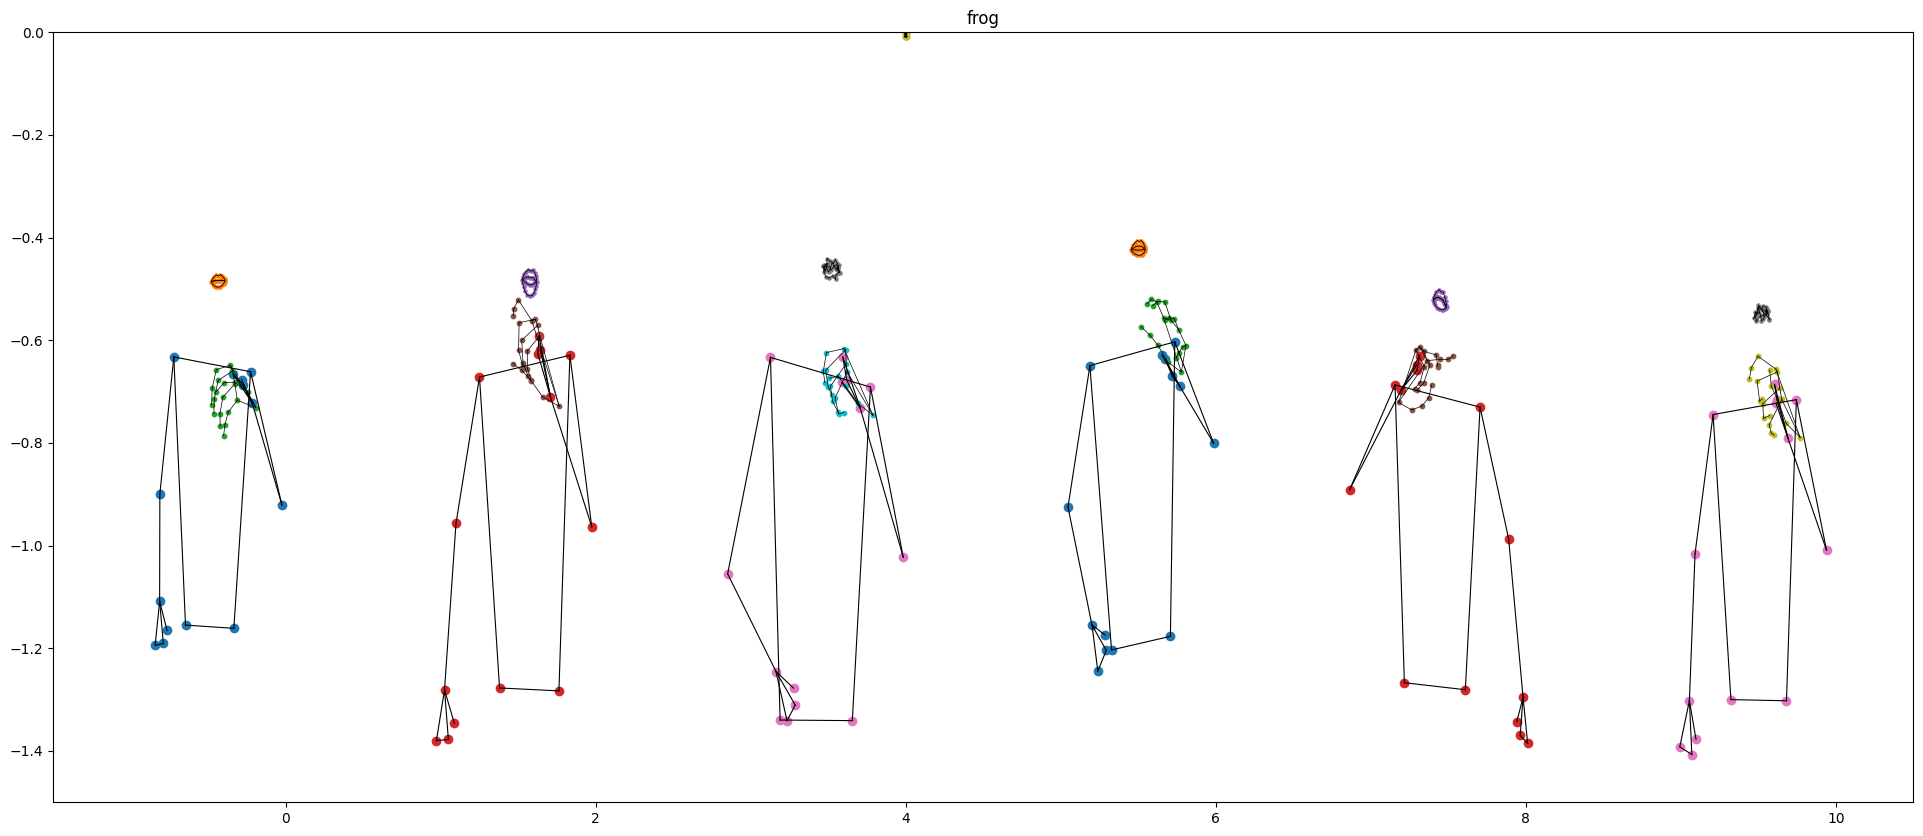

In [8]:
target_sign = 90
anim = visualize_target_sign(dataset,target_sign,n_samples=6)
HTML(anim.to_jshtml())

In [5]:
from dl_utils import *

In [6]:
dataloader = get_dataloader(dataset, batch_size=128, shuffle=True, dl_framework='TENSORFLOW')
type(dataloader)

tensorflow.python.data.ops.batch_op._BatchDataset

In [7]:
for X,y in dataloader:
    print(y)
    break

tf.Tensor(
[202 130 247 131  33 143  47 199 163 241 223  54  70  17 166 112   0   2
 228  38 137 224 102  85  23 220 119  14 193  61  37 241 187 102  68 207
 220   5 221 248  78 161 212 246 103 166 148 173  57  55  17 209   7 182
 172 114 131  53  84  31  95 194 120  15 226  24  76 219 128 189 242   4
 169 150 196  60  65 119  19 238 159 187 175 105 110  22  79  42 141  68
  29  91  52  99   2 100   5  83 195  27 210 229 174 138 235 155 221 242
 153 189 124  93 209  33  36  59  37  20 148 212 193 219 145  50  58   6
 136 223], shape=(128,), dtype=int32)
tf.Tensor(
[ 97 120 208 119 240 233  45 233 208 245 223 154 140  12 169 137  61 163
 105 134 114  91 114 118  31 150  79 188 146 235  52  37 245 206 225 126
  36 117  68 231 189 212 193  50 181 243 163  86 116 231 174 202 229  75
 249 117 201  50  29  11 162  23 182 109 234 205 225 107 232 143 150  96
  10 241 240  91 108 235 222  30  37 123 101 197 148 108 201  77 246  17
  99  52  25 246 119  77 177 170  25 141 185 163 169 216 198 139

In [8]:
(BATCH_SIZE, INPUT_SIZE ,N_LANDMARKS, N_DIMS)

(128, 32, 96, 2)

In [9]:
from src.models.tf_models import Very_simple_model 

model = Very_simple_model((BATCH_SIZE, N_LANDMARKS, N_DIMS))
model

In [10]:
model.compile(loss="SparseCategoricalCrossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics="accuracy")

In [11]:
model(X)

<tf.Tensor: shape=(128, 250), dtype=float32, numpy=
array([[0.00677454, 0.00105678, 0.00192146, ..., 0.00356128, 0.00044186,
        0.00667572],
       [0.0097817 , 0.00159979, 0.00229597, ..., 0.00300301, 0.00052369,
        0.00681855],
       [0.00942622, 0.00263584, 0.00237037, ..., 0.0043106 , 0.00111976,
        0.00484115],
       ...,
       [0.00938991, 0.00122264, 0.00170089, ..., 0.00386731, 0.00046109,
        0.00674574],
       [0.01188719, 0.00167492, 0.00229503, ..., 0.00400796, 0.00113182,
        0.00463266],
       [0.01130754, 0.00206411, 0.00244784, ..., 0.0036462 , 0.00104374,
        0.00444863]], dtype=float32)>

In [13]:
y.shape

TensorShape([128, 1])